# B. Anomaly Detection: Multivar. Gaussian

Goal of this workbook
1. Know why we use Multivariate Gaussian method for detecting Anomalies
2. Know how to implement from ground up
3. Know how the covariance matrix relates

### Import Modules

**Resources**

[Original Paper](https://feitonyliu.files.wordpress.com/2009/07/liu-iforest.pdf) 

[CSE601 Lecture Notes](http://cs.uwc.ac.za/~abagula/cos730/docs/ImportantSlides-Outlier-Detection.pdf)

In [21]:
# dataframe / analysis tools
import pandas as pd, 
import numpy as np
import scipy as sp
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, multivariate_normal

%matplotlib inline

def normalize(x):
    mu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    return (x - mu)/sigma

def ad_plot(x, y, mask):
    plt.figure(figsize=(16,8))
    sns.kdeplot(x, y)
    sns.regplot(x=x[~mask], y=y[~mask], fit_reg=False,color='g',scatter_kws={'alpha':0.25})
    sns.regplot(x=x[mask], y=y[mask],fit_reg=False,color='red')
    
def estimate_gaussian(x):
    # Step 1: Normalize
    x = normalize(x)
    # Step 2: Use sp.stats.norm.pdf on results above
    x = x.apply(lambda v: sp.stats.norm.pdf(v),1)
    # Step 3: get Probabilities of Feature_1 x Features_2 x .... Feature_n
    return x.apply(np.prod,1)

def get_mu_sig(x):
    mu = np.mean(x, axis=0)
    sigma = np.cov(x.T)
    return mu, sigma

def multivariateGaussian(x,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(x)

In [2]:
df_hw = pd.read_csv('C:/Users/Cglan/Desktop/github/civicu-machine-learning/lessons/shared-resources/heights_weights_genders.csv')
df_hw.head().append(df_hw.tail())

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


### Questions

1. Is our data normally distributed?
2. What does our covariance matrix look like?
3. Are there any transformations to do on the data?
4. Should we split the data up in any way?


### Explore and Preprocess Data

In [4]:
np.cov(normalize(df_hw.drop('Gender', 1)).T)

array([[ 1.00010001,  0.92484878],
       [ 0.92484878,  1.00010001]])

In [5]:
df_m = df_hw.query("Gender == 'Male'").iloc[:,1:3]
df_f = df_hw.query("Gender == 'Female'").iloc[:,1:3]

#### Plot Heights and Weights Density Distribution
Make a Kernal Density Estimate plot. [More about KDE.]('https://en.wikipedia.org/wiki/Kernel_density_estimation')

Note, your data should be Normally distributed! If your data does not look normal, transform it with a function like `np.log()`.

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


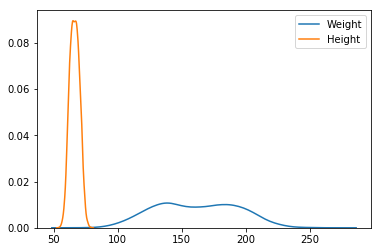

In [6]:
## Your turn: plot histograms and/or density plots of height weight

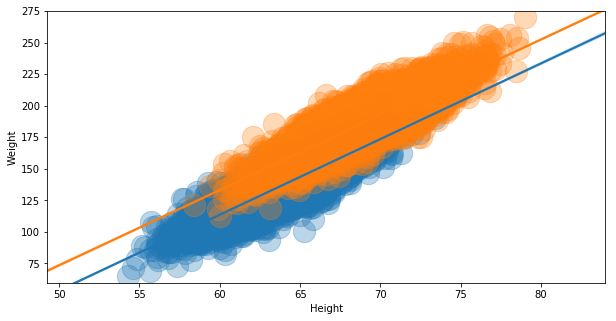

In [8]:
plt.figure(figsize=(10,5))
plt.ylim(df_hw.Weight.min()-5, df_hw.Weight.max()+5)
plt.xlim(df_hw.Height.min()-5, df_hw.Height.max()+5)
sns.regplot(df_f.Height, df_f.Weight, scatter_kws={'alpha':0.3,'s':500})
sns.regplot(df_m.Height, df_m.Weight,scatter_kws={'alpha':0.3,'s':500})

## Run Gaussian Anomaly Detection
- Use what you learned from the other notebook here


In [26]:
df_m_raw = df_hw.query("Gender == 'Male'").iloc[:,1:3]
df_m_raw['prob'] = estimate_gaussian(normalize(df_m_raw))

df_f_raw = df_hw.query("Gender == 'Female'").iloc[:,1:3]
df_f_raw['prob'] = estimate_gaussian(normalize(df_f_raw))

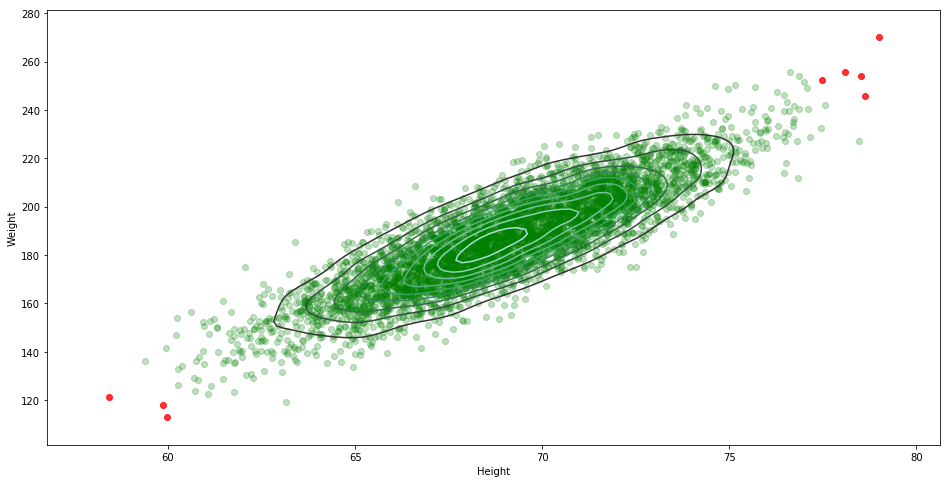

In [25]:
mask_m = df_m.prob < 1/100000
ad_plot(x = df_m_raw.Height, y =  df_m_raw.Weight, mask = df_m.prob < 1/100000)

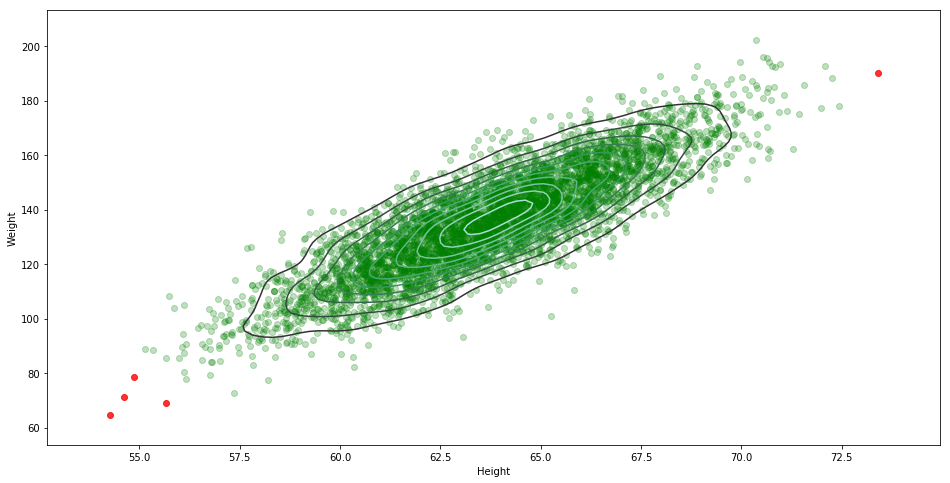

In [27]:
mask_f = df_f.prob < 1/100000
ad_plot(x = df_f_raw.Height, y =  df_f_raw.Weight, mask = mask_f)

## Multivariate Gaussian Anomaly Detection

Questions:
1. What are some issues with the first method?
2. Try implementing multivar. gaussian here
3. What happens when you use a covariance matrix of np.array([[1,0],[0,1]])


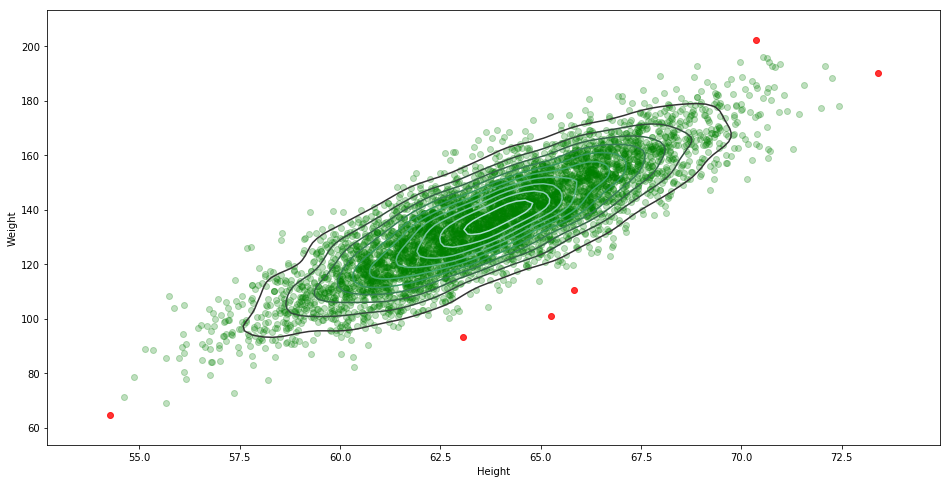